In [1]:
import pandas as pd
from ScrapeNBATeamData import NBATeamDataScraper

In [2]:
from sklearn import preprocessing

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as sm


Scrape Training and Test data from basketballreference.com

In [28]:
train_df0 = NBATeamDataScraper.perform_scrape_all_seasons_in_range(NBATeamDataScraper, 2015, 2020)
test_df0 = NBATeamDataScraper.perform_scrape_all_seasons_in_range(NBATeamDataScraper, 2021, 2021)

Drop Games, Team, Rank

- We don't care about Games played as every team will play the same number of games, and we assume that the small exceptions to the 82 game rule (2011, 2020) will not introduce too much confusion
- Team, we are filtering out for now to take down the size of our training data. It might make sense to include team in order to account for the proficiency/talent of certain organizations (spurs, pacers, celtics).
- Rank would inform us of whether a team is going to the playoffs, so it would be silly to include
- PLYF indicates whether a team went to playoffs. This would be a silly variable to include in gauging number of wins (but it might be a good alternative y variable.
- FTA_OPP (free throws attempted by opponent) is so heavily correlated logically with players fouled by team in question that we're going to drop it.


Last 30 rows are testing data

In [29]:
train_df0.shape, test_df0.shape

((180, 51), (30, 51))

In [30]:
test_df0

,Team,WINS,Rk,G,MP,FG,FGA,FG%,3P,3PA,...,ORB_OPP,DRB_OPP,TRB_OPP,AST_OPP,STL_OPP,BLK_OPP,TOV_OPP,PF_OPP,PTS_OPP,PLYF
0,Philadelphia 76ers,18,5,27,240.9,41.4,86.4,.480,10.4,29.1,...,10.2,32.4,42.6,24.1,7.5,4.4,15.0,22.0,110.8,0
1,Brooklyn Nets,16,1,28,243.6,43.6,87.6,.497,14.5,36.6,...,10.5,32.8,43.3,25.0,8.1,4.3,12.5,19.6,117.5,0
2,Boston Celtics,13,26,25,240.0,41.0,88.2,.464,12.5,32.6,...,9.2,33.0,42.3,23.5,7.2,5.3,14.6,19.8,109.6,0
3,New York Knicks,13,13,28,240.0,38.7,85.8,.451,9.8,27.5,...,10.2,34.4,44.6,22.2,6.4,5.7,11.4,18.6,103.3,0
4,Toronto Raptors,12,11,26,240.0,40.2,88.9,.452,15.8,40.8,...,10.0,35.1,45.0,26.7,6.8,5.8,16.8,19.5,111.9,0
5,Milwaukee Bucks,16,2,26,240.0,45.2,91.7,.493,15.3,38.2,...,9.3,33.5,42.7,24.0,6.5,5.1,13.2,18.3,112.6,0
6,Indiana Pacers,14,8,27,241.9,42.4,89.2,.475,12.6,33.9,...,10.4,34.4,44.9,25.3,6.9,5.7,14.8,18.4,111.0,0
7,Chicago Bulls,10,17,25,241.0,42.3,88.1,.480,13.7,35.9,...,9.1,33.6,42.7,24.0,8.7,4.0,14.4,19.6,116.1,0
8,Cleveland Cavaliers,10,24,27,243.7,39.4,87.7,.449,9.1,26.6,...,10.4,33.9,44.3,24.7,8.4,6.0,15.8,20.4,111.9,0
9,Detroit Pistons,7,22,26,245.8,38.3,88.4,.434,12.6,35.9,...,9.7,35.4,45.2,25.2,7.8,5.9,15.9,21.8,113.0,0


In [31]:
total_df = train_df0.append(test_df0)

In [32]:
total_df.shape

(210, 51)

In [33]:
total_df = total_df.drop(["G", "Team", "Rk", "PLYF"], axis=1)

In [34]:
total_df.shape

(210, 47)

x = train_df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_df2 = pd.DataFrame(x_scaled)

https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well

In [35]:
total_df2 = total_df.apply(pd.to_numeric)
total_df2_labels = total_df.columns

In [36]:
total_df2.shape

(210, 47)

In [37]:
cols_to_normalize = total_df2_labels[1:]
cols_to_normalize

Index(['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Rk_OPP', 'G_OPP', 'MP_OPP', 'FG_OPP', 'FGA_OPP', 'FG%_OPP',
       '3P_OPP', '3PA_OPP', '3P%_OPP', '2P_OPP', '2PA_OPP', '2P%_OPP',
       'FT_OPP', 'FTA_OPP', 'FT%_OPP', 'ORB_OPP', 'DRB_OPP', 'TRB_OPP',
       'AST_OPP', 'STL_OPP', 'BLK_OPP', 'TOV_OPP', 'PF_OPP', 'PTS_OPP'],
      dtype='object')

In [38]:
total_df2[cols_to_normalize] = total_df2[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

corrMatrix = train_df_copy.corr()
s = corrMatrix.unstack()
so = s.sort_values(kind="quicksort")

so[-70:]

In [39]:
test_df1 = total_df2[-30:]

In [40]:
train_df1 = total_df2[:-30]

corrMatrix = train_df_copy.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [41]:
train_df1

,WINS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%_OPP,ORB_OPP,DRB_OPP,TRB_OPP,AST_OPP,STL_OPP,BLK_OPP,TOV_OPP,PF_OPP,PTS_OPP
0,49,0.362069,0.365217,0.363095,0.494737,0.333333,0.334426,0.333333,0.572816,0.617424,...,0.062500,0.744186,0.239583,0.358696,0.490196,0.210526,0.588235,0.442857,0.455882,0.291971
1,40,0.413793,0.452174,0.636905,0.368421,0.256410,0.318033,0.095238,0.757282,0.810606,...,0.291667,0.674419,0.510417,0.597826,0.401961,0.263158,0.676471,0.542857,0.235294,0.302920
2,38,0.517241,0.321739,0.345238,0.452632,0.136752,0.163934,0.133333,0.747573,0.803030,...,0.041667,0.790698,0.416667,0.554348,0.578431,0.447368,0.441176,0.371429,0.411765,0.291971
3,18,0.258621,0.000000,0.321429,0.000000,0.290598,0.373770,0.028571,0.213592,0.545455,...,0.302083,0.813953,0.614583,0.771739,0.578431,0.894737,0.735294,0.785714,0.441176,0.295620
4,17,0.362069,0.121739,0.285714,0.210526,0.153846,0.157377,0.285714,0.504854,0.772727,...,0.333333,0.697674,0.375000,0.467391,0.382353,0.500000,0.382353,0.400000,0.279412,0.302920
5,53,0.206897,0.347826,0.297619,0.526316,0.435897,0.413115,0.476190,0.436893,0.484848,...,0.187500,0.651163,0.145833,0.206522,0.617647,0.447368,0.441176,0.285714,0.485294,0.211679
6,50,0.413793,0.252174,0.339286,0.357895,0.247863,0.242623,0.342857,0.543689,0.708333,...,0.229167,0.860465,0.291667,0.456522,0.235294,0.368421,0.705882,0.128571,0.588235,0.178832
7,41,0.517241,0.339130,0.285714,0.536842,0.136752,0.111475,0.438095,0.766990,0.825758,...,0.156250,0.790698,0.260417,0.402174,0.441176,0.657895,0.529412,0.871429,0.426471,0.164234
8,38,0.362069,0.252174,0.357143,0.326316,0.213675,0.206557,0.333333,0.582524,0.761364,...,0.270833,0.418605,0.427083,0.380435,0.205882,0.368421,0.500000,0.200000,0.617647,0.149635
9,32,0.310345,0.295652,0.511905,0.252632,0.307692,0.327869,0.257143,0.524272,0.719697,...,0.468750,0.627907,0.468750,0.532609,0.588235,0.236842,0.529412,0.385714,0.308824,0.240876


In [42]:
y_train = train_df1["WINS"]
x_train = train_df1.drop(["WINS"], axis=1)

y_test = test_df1["WINS"]
x_test = test_df1.drop(["WINS"],axis=1)

In [188]:
y_test

0     18
1     16
2     13
3     13
4     12
5     16
6     14
7     10
8     10
9      7
10    13
11    11
12    11
13    10
14     6
15    22
16    15
17    14
18    10
19     6
20    21
21    19
22    16
23    14
24    12
25    15
26    13
27    10
28    11
29    11
Name: WINS, dtype: int64

# Linear Regression

In [142]:
logreg = linear_model.LinearRegression()

# Train the model using the training sets
logreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
Y_pred_linear_regression = logreg.predict(x_test)

In [144]:
Y_pred_linear_regression

array([  4.02423414,  -8.7843432 , -17.14299462,  -4.3041287 ,
       -17.80906575,   0.64879417, -10.18778092,  -9.63223108,
       -15.32963564, -16.12192868,  11.29646196,   2.29499698,
       -53.98891692, -40.2820981 , -42.1798186 ,  -9.36262896,
       -33.90754441,  -7.83466757,  -6.84868053, -42.00060681,
         2.1068186 , -15.59016859,  -3.9976046 , -10.19116154,
       -40.52578149, -12.18593662, -17.19676823, -23.72335361,
       -20.98026453,  -9.90823044])

In [87]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, Y_pred_linear_regression), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, Y_pred_linear_regression), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, Y_pred_linear_regression), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, Y_pred_linear_regression), 2)) 
print("R2 score =", round(sm.r2_score(y_test, Y_pred_linear_regression), 2))

Mean absolute error = 7.74
Mean squared error = 90.4
Median absolute error = 6.55
Explain variance score = -4.42
R2 score = -5.15


# Random Forest

In [33]:
# xgboost for feature importance on a regression problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train_X, train_Y)

/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
y_pred = model.predict(test_X)


Y_pred_linear_regression

print("Mean absolute error =", round(sm.mean_absolute_error(test_Y, Y_pred_linear_regression), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_Y, Y_pred_linear_regression), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_Y, Y_pred_linear_regression), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_Y, Y_pred_linear_regression), 2)) 
print("R2 score =", round(sm.r2_score(test_Y, Y_pred_linear_regression), 2))

Mean absolute error = 19.9
Mean squared error = 513.97
Median absolute error = 22.5
Explain variance score = -7.21
R2 score = -33.97


Feature:  0 , Score: 0.01757670951711364
Feature:  1 , Score: 0.021696018515040688
Feature:  2 , Score: 0.019261428713165944
Feature:  3 , Score: 0.02818486814007424
Feature:  4 , Score: 0.01863733279858982
Feature:  5 , Score: 0.014383593603241132
Feature:  6 , Score: 0.029632845421674176
Feature:  7 , Score: 0.020777248150888723
Feature:  8 , Score: 0.021352634379113306
Feature:  9 , Score: 0.022876081285614462
Feature:  10 , Score: 0.021171361211345396
Feature:  11 , Score: 0.02220104682210746
Feature:  12 , Score: 0.029808753315919458
Feature:  13 , Score: 0.020853564327615284
Feature:  14 , Score: 0.021618221657171175
Feature:  15 , Score: 0.021963750313507103
Feature:  16 , Score: 0.023677390517266562
Feature:  17 , Score: 0.022184602664086728
Feature:  18 , Score: 0.018817618039769494
Feature:  19 , Score: 0.023143301302696352
Feature:  20 , Score: 0.024237770623752843
Feature:  21 , Score: 0.020044124251095852
Feature:  22 , Score: 0.025384827523331904
Feature:  23 , Score: 0.0

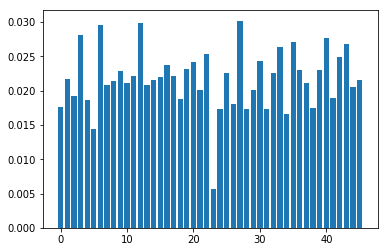

In [41]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ',i, ', Score:', v)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [42]:
importance

array([0.01757671, 0.02169602, 0.01926143, 0.02818487, 0.01863733,
       0.01438359, 0.02963285, 0.02077725, 0.02135263, 0.02287608,
       0.02117136, 0.02220105, 0.02980875, 0.02085356, 0.02161822,
       0.02196375, 0.02367739, 0.0221846 , 0.01881762, 0.0231433 ,
       0.02423777, 0.02004412, 0.02538483, 0.00568111, 0.01734375,
       0.02250334, 0.01806107, 0.03019833, 0.01726463, 0.02016685,
       0.02428106, 0.01728168, 0.02259337, 0.0263899 , 0.01652628,
       0.02713519, 0.02303165, 0.02117905, 0.01742997, 0.02296478,
       0.0277352 , 0.01899254, 0.02490052, 0.02687465, 0.02048711,
       0.02149289])

# Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)

In [45]:
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [46]:
y_train = y_train.reshape(1, -1)


/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [47]:
x_test.shape

(30, 46)

In [48]:
output = clf.predict(x_test)

In [49]:
output

array([48, 58, 42, 35, 34, 58, 35, 20, 19, 19, 35, 20, 42, 27, 15, 57, 15,
       46, 20, 22, 58, 57, 46, 34, 29, 35, 33, 15, 36, 20])

In [64]:
li = []

In [86]:
for i in range(30):
    print(test_df0['Team'][i], ":", output[i])
    li.append([test_df0['Team'][i], output[i]])

Philadelphia 76ers : 48
Brooklyn Nets : 58
Boston Celtics : 42
New York Knicks : 35
Toronto Raptors : 34
Milwaukee Bucks : 58
Indiana Pacers : 35
Chicago Bulls : 20
Cleveland Cavaliers : 19
Detroit Pistons : 19
Charlotte Hornets : 35
Miami Heat : 20
Atlanta Hawks : 42
Orlando Magic : 27
Washington Wizards : 15
Utah Jazz : 57
Portland Trail Blazers : 15
Denver Nuggets : 46
Oklahoma City Thunder : 20
Minnesota Timberwolves : 22
Los Angeles Lakers : 58
Los Angeles Clippers : 57
Phoenix Suns : 46
Golden State Warriors : 34
Sacramento Kings : 29
San Antonio Spurs : 35
Dallas Mavericks : 33
Memphis Grizzlies : 15
New Orleans Pelicans : 36
Houston Rockets : 20


In [87]:
li

,0
0,Philadelphia 76ers
1,48
2,Brooklyn Nets
3,58
4,Boston Celtics
5,42
6,New York Knicks
7,35
8,Toronto Raptors
9,34
